The trial of LibJ barcode virus infecting CD4 T cells, with the presence of DRV.  
I sampled cells every 12 hours.  
Integration sites and alternative splicing are sequenced at the same time, both with valid UMI.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as ss
from matplotlib import pyplot as plt

## Integration sites linkage sequencing quality controls

In [29]:
hdatadict = {}
for time in range(12,132,12):
    hdatadict[time] = pd.read_csv('ISS_linkage/linkage_'+str(time)+'h.txt',sep='\t',names=['UMI','UMI_count','barcode','barcode_freq','second_bc_freq','site_type','site_annot','site_freq','second_site_freq'])
hdata = pd.concat(hdatadict)
hdata

UMI  UMI_count                      barcode  barcode_freq  \
12  0       GATGACATGG          1  CTTATAGCAGTAGAAGTCGAAGTTGGG           1.0   
    1       ATAAATCACT          1  CTTATAGCTGGTGATGTTGAGGTAGTT           1.0   
    2       CCCAGCACAA          1  CTTATAGGCGCTGAAGAGGCTGAAGTT           1.0   
    3       TTATTTATTC          1  CTTATAGGAGACGGTGAAGTAGTTGTT           1.0   
    4       TGTTTCCACA          1  CTTATAGGCGACGGAGATGCTGTAGGT           1.0   
...                ...        ...                          ...           ...   
120 247346  TCGTCATGGC          1  CTTATAGCAGACGACGAATTCGAAGGA           1.0   
    247347  GGTGTGGCGC          1  CTTATAGAGGTTGTGGCAGCAGACGCA           1.0   
    247348  TTAGCTGGGG          4  CTTATAGAAGTGGGAGTAGAGGGGGAG           0.5   
    247349  GGTGTGGCGA          2  CTTATAGATGTGGTTGATGGAGGCGGC           1.0   
    247350  ACACAAGGGT          1  CTTATAGCTGATGAAGCAGAAGCCGCA           1.0   

            second_bc_freq site_type  \
12  0                  NaN      hg19   
    1                  NaN   plasmid   
    2                  NaN      free   
    3                  NaN      hg19   
    4                  NaN   plasmid   
...                    ...       ...   
120 247346             NaN   plasmid   
    247347             NaN      free   
    247348            0.25      free   
    247349             NaN      hg19   
    247350             NaN      free   

                                                   site_annot  site_freq  \
12  0                                         chr2:33141553:+        1.0   
    1       CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
    2                                                  CCCAGG        1.0   
    3                                         chr2:33141650:+        1.0   
    4       CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
...                                                       ...        ...   
120 247346  CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...        1.0   
    247347                                                  G        1.0   
    247348                                                  G        0.5   
    247349                                     chr3:6977918:-        0.5   
    247350                                                 GT        1.0   

            second_site_freq  
12  0                    NaN  
    1                    NaN  
    2                    NaN  
    3                    NaN  
    4                    NaN  
...                      ...  
120 247346               NaN  
    247347               NaN  
    247348              0.25  
    247349              0.50  
    247350               NaN  

[3264054 rows x 9 columns]

In [30]:
hdata['time']=hdata.index.get_level_values(0)

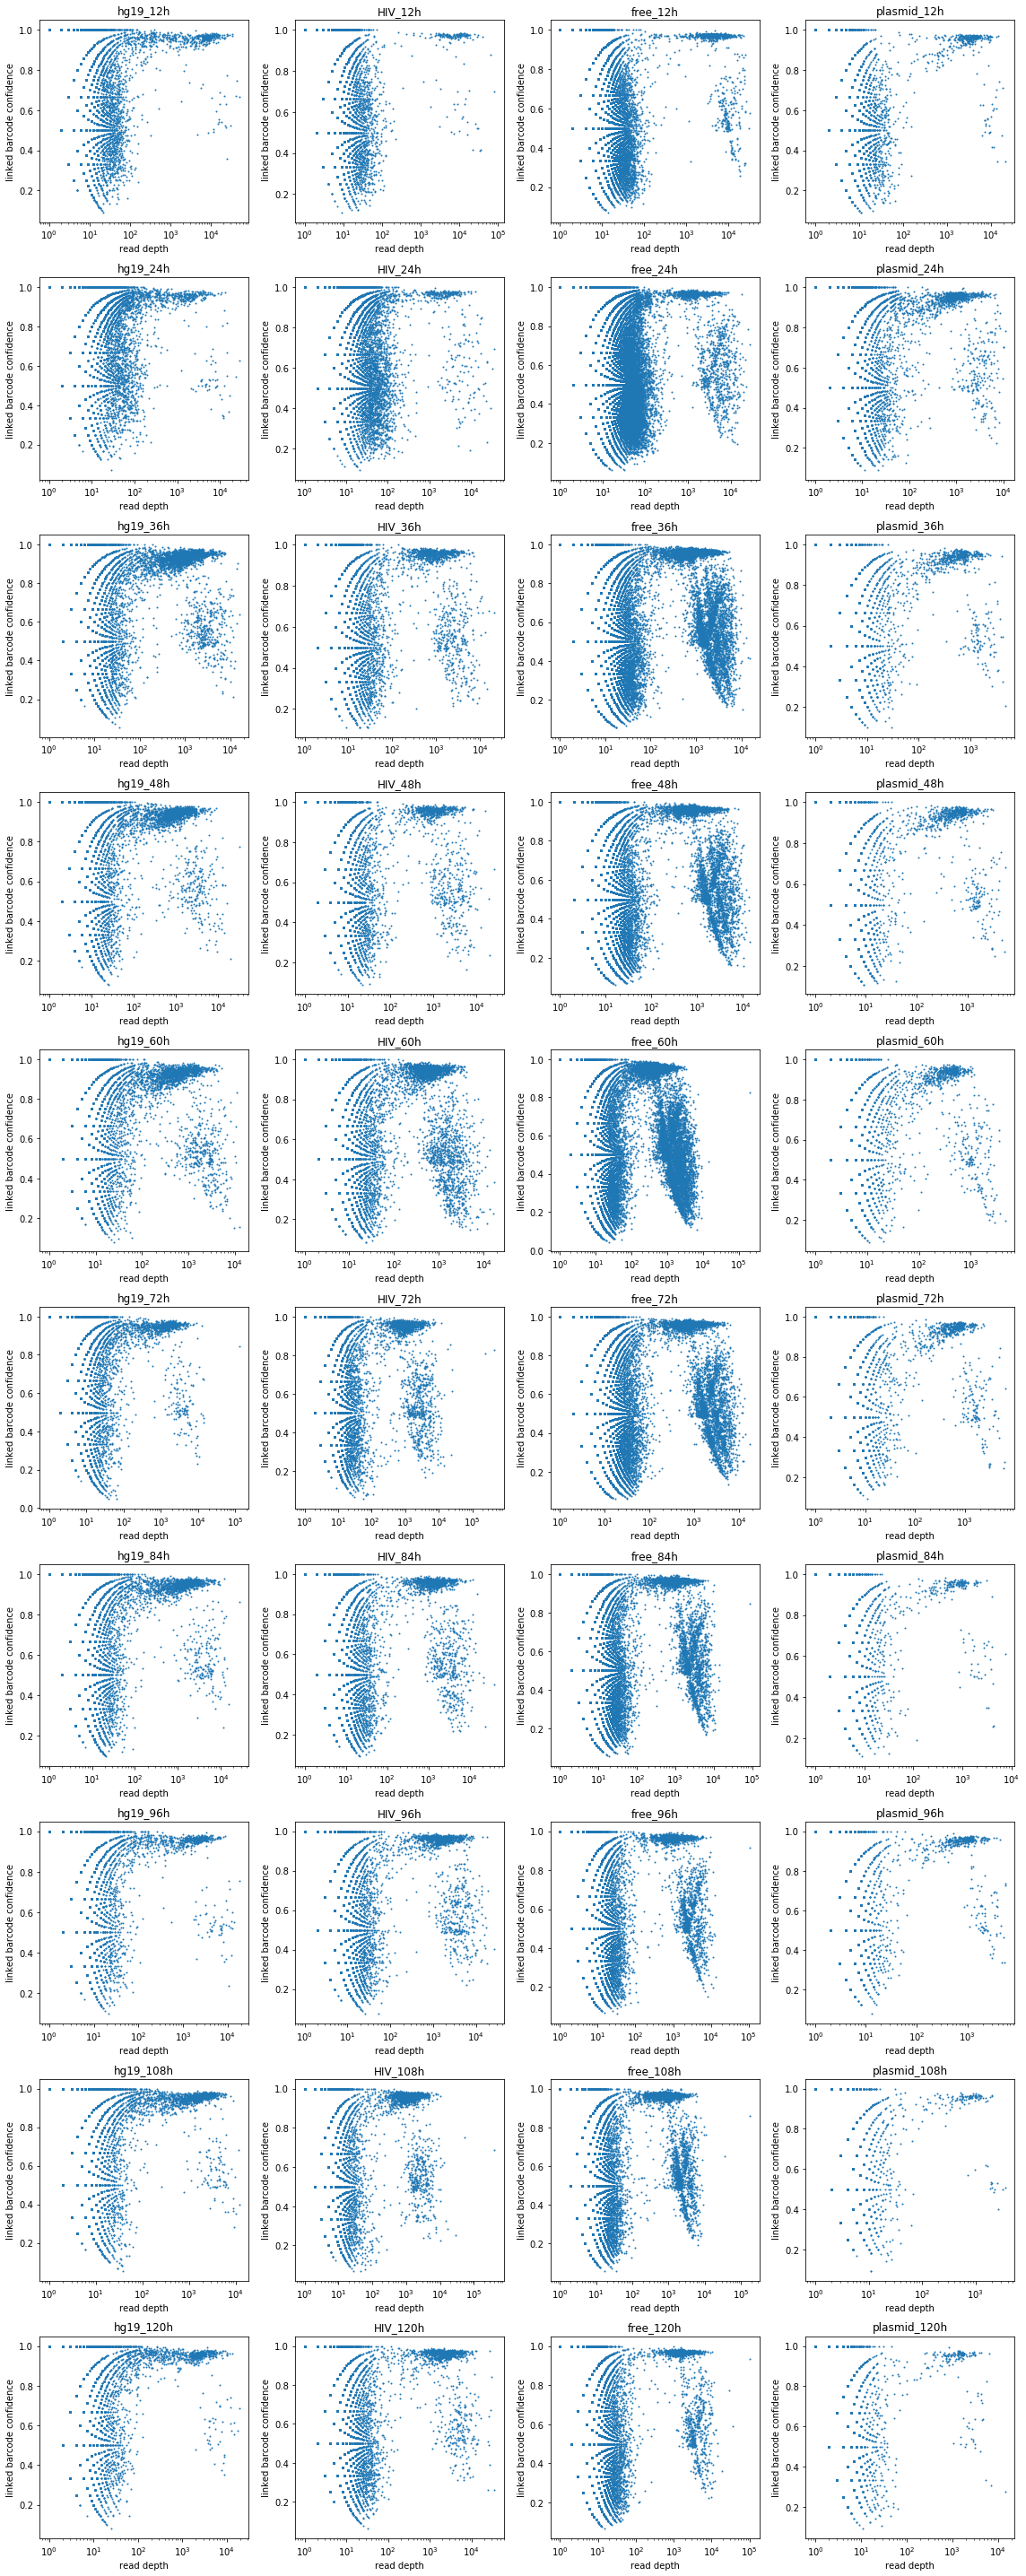

In [31]:
stypelist = ['hg19','HIV','free','plasmid']
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.scatter(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count'],hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['barcode_freq'],s=1)
        plt.title(site_type+'_'+str(time)+'h')
        plt.xlabel('read depth')
        plt.ylabel('linked barcode confidence')
        plt.xscale('log')
plt.tight_layout()
plt.savefig('linkage_quality.png',dpi=600)

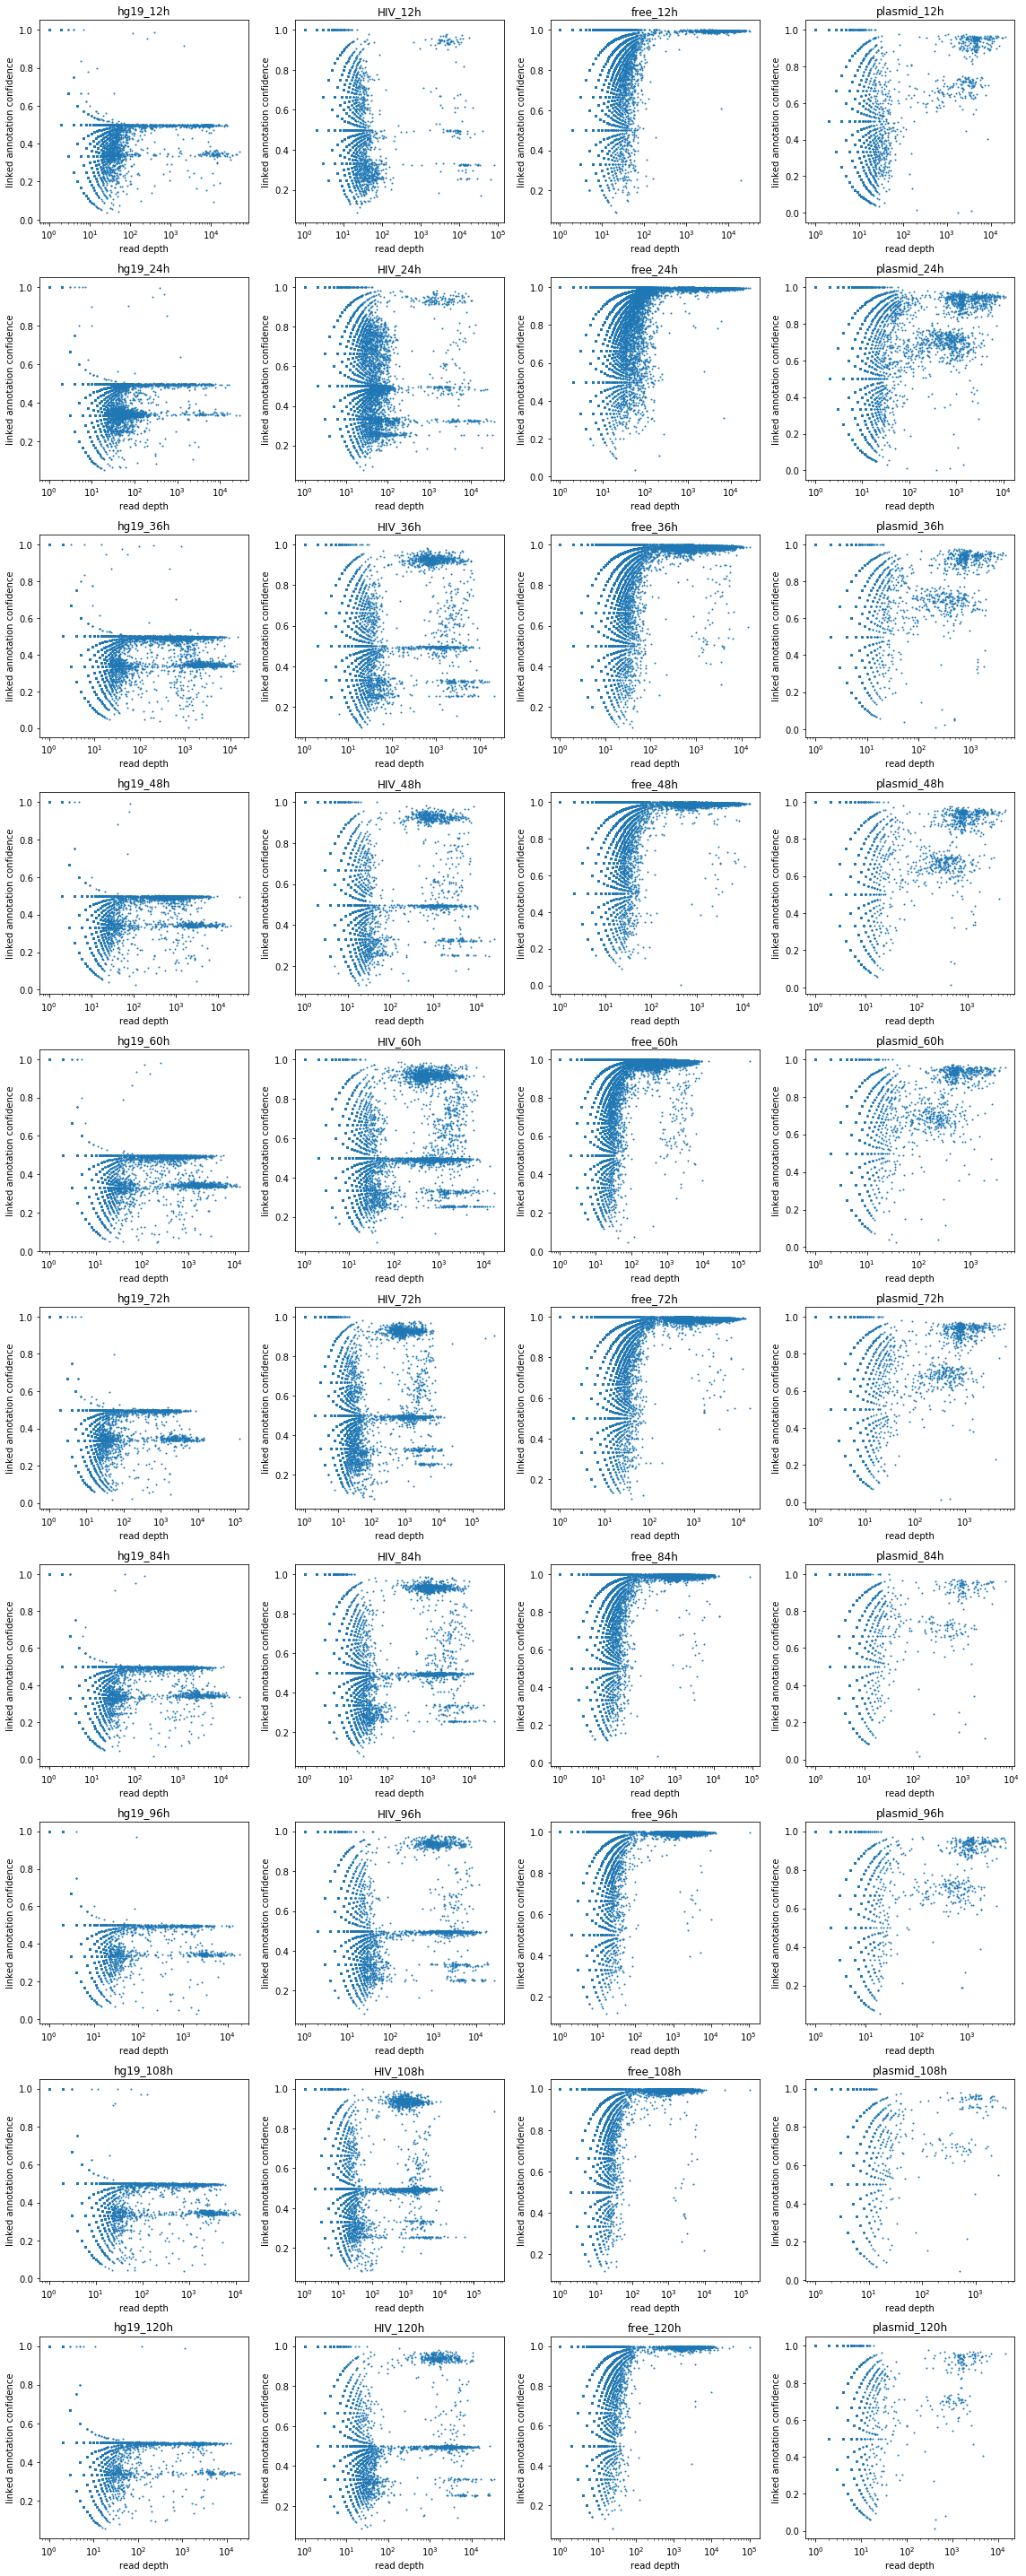

In [33]:
stypelist = ['hg19','HIV','free','plasmid']
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.scatter(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count'],hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['site_freq'],s=1)
        plt.title(site_type+'_'+str(time)+'h')
        plt.xlabel('read depth')
        plt.ylabel('linked annotation confidence')
        plt.xscale('log')
plt.tight_layout()
plt.savefig('linkage_quality_site.png',dpi=600)

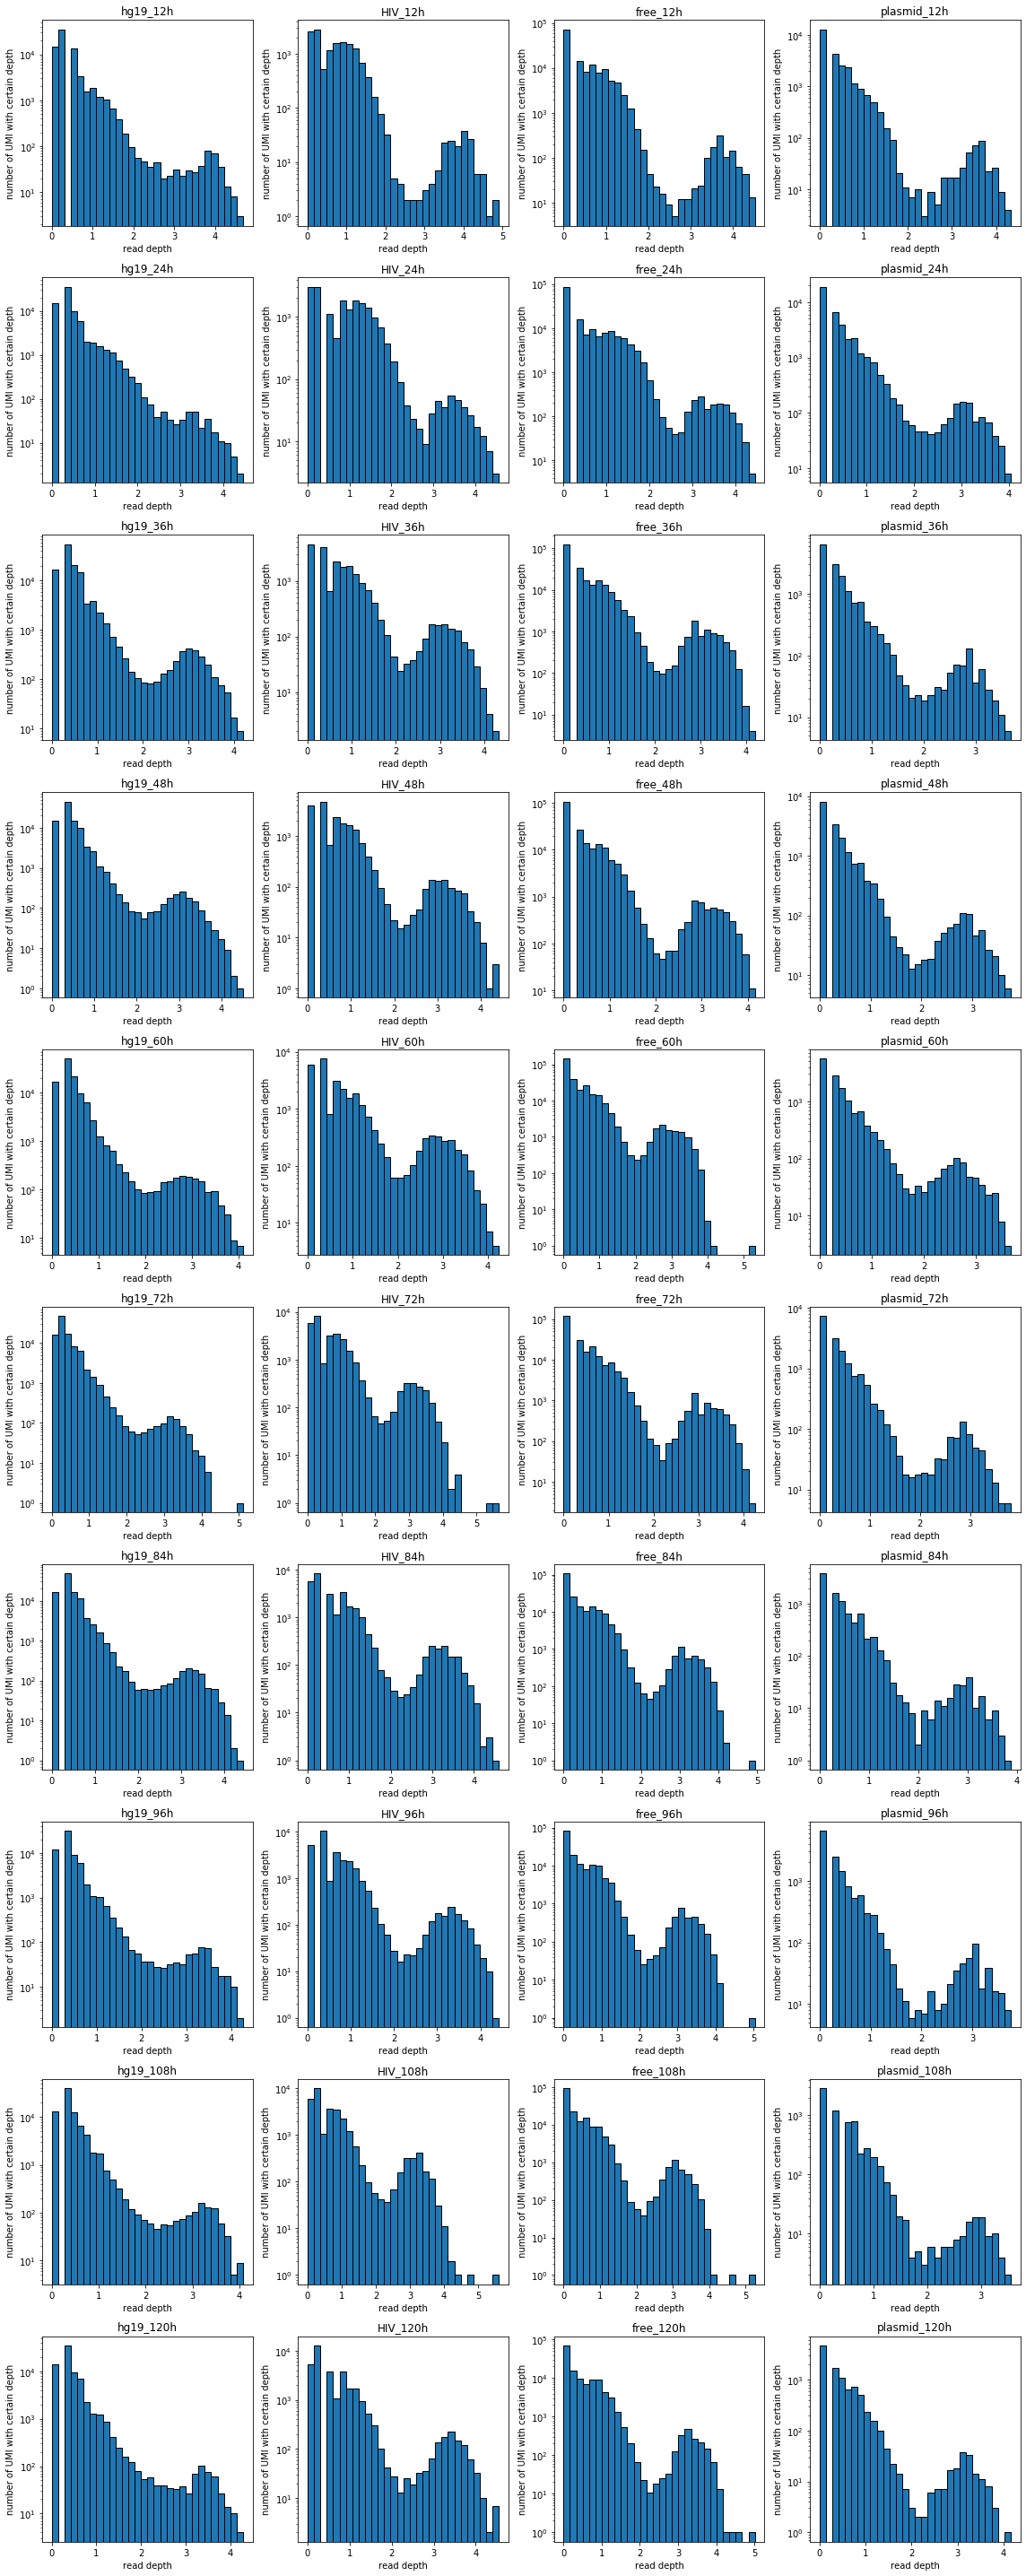

In [32]:
plt.figure(figsize=(16,40))
ploti = 0
for time in range(12,132,12):
    for site_type in stypelist:
        ploti += 1
        plt.subplot(10,4,ploti)
        plt.hist(np.log10(hdata[(hdata['site_type']==site_type)&(hdata['time']==time)]['UMI_count']),bins=30,edgecolor='black')
        plt.yscale('log')
        plt.xlabel('read depth')
        plt.ylabel('number of UMI with certain depth')
        plt.title(site_type+'_'+str(time)+'h')
plt.tight_layout()
plt.savefig('sequencing_depth.png',dpi=600)

In [28]:
hdata[(hdata['site_type']==site_type)&(hdata['time']==120)]

UMI  UMI_count                      barcode  barcode_freq  \
120 1       ACCTCCAGAC          1  CTTATAGAGGAGGAGGTAGACGCCGTT      1.000000   
    12      GTGCACGGTG          2  CTTATAGACGGAGCCGAAGGGGACGGA      0.500000   
    30      TAGGACGTTT          1  CTTATAGGCGGGGGTGAAGTCGAAGAA      1.000000   
    37      AACGCCGGAG          1  CTTATAGTTGAAGTCGAAGATGGAGTA      1.000000   
    53      AATGTCCACT          1  CTTATAGCCGACGTAGCGGACGCAGAA      1.000000   
...                ...        ...                          ...           ...   
    336015  AGTCGACTCT          6  CTTATAGAAGTTGAAGCAGCCGTCGTA      0.833333   
    336035  GCATCGTGGA          4  CTTATAGACGATGCAGAGGCTGCGGAC      0.500000   
    336046  AGGCATATAG          4  CTTATAGGGGTTGCCGTTGACGACGAT      0.250000   
    336064  GCAGGCAATT          2  CTTATAGGCGACGTCGAAGAAGTCGCT      0.500000   
    336068  TGGTNCACGT          2  CTTATAGAGGGAGTTGAAGACGNTGTA      1.000000   

            second_bc_freq site_type  \
120 1                  NaN   plasmid   
    12            0.500000   plasmid   
    30                 NaN   plasmid   
    37                 NaN   plasmid   
    53                 NaN   plasmid   
...                    ...       ...   
    336015        0.166667   plasmid   
    336035        0.250000   plasmid   
    336046        0.250000   plasmid   
    336064        0.500000   plasmid   
    336068             NaN   plasmid   

                                                   site_annot  site_freq  \
120 1       CCCAGGAGGTAGAGGTAGCAGTGAGCCAAGATCGCGCCACTGCATT...   1.000000   
    12      CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   0.500000   
    30      CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   1.000000   
    37      CACAGGAGGTAGCGGTTGCAGTGAGCCAAGATAGCGCCAATGCATT...   1.000000   
    53      CCCAGGAGGTATAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   1.000000   
...                                                       ...        ...   
    336015   CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATTCC   0.833333   
    336035  CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   0.250000   
    336046  CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   0.250000   
    336064  CCAAGAAGGTAGAGGTTGCAGTGAGACAAGATCGCGCCACTGAATT...   0.500000   
    336068  CCCAGGAGGTAGAGGTTGCAGTGAGCCAAGATCGCGCCACTGCATT...   1.000000   

            second_site_freq  time  
120 1                    NaN   120  
    12              0.500000   120  
    30                   NaN   120  
    37                   NaN   120  
    53                   NaN   120  
...                      ...   ...  
    336015          0.166667   120  
    336035          0.250000   120  
    336046          0.250000   120  
    336064          0.500000   120  
    336068               NaN   120  

[17879 rows x 10 columns]